# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Signal detection theory
### VIDEO: F-score
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
## run experiment

# number of 'trials' in the experiment
N = 50 # actual trials is 2N

# number of experiment repetitions
numExps = 10000

# initialize
Fscores     = np.zeros(numExps)
dPrimes     = np.zeros(numExps)
specificity = np.zeros(numExps)


### run the experiment!
for expi in range(numExps):
    
    # generate data
    H = np.random.randint(1,N)  # hits
    M = N-H                     # misses
    CR = np.random.randint(1,N) # correct rejections
    FA = N-CR                   # false alarms
    
    # Fscore
    Fscores[expi] = H / (H+(FA+M)/2)
    
    # specificity
    specificity[expi] = CR/(CR+FA)
    
    # d'
    dPrimes[expi] = stats.norm.ppf(H/N) - stats.norm.ppf(FA/N)
    
    
    # not used here...
    precision = H/(H+FA)
    recall    = H/(H+M)


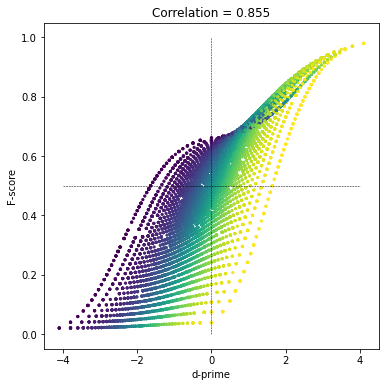

In [3]:
## let's see how they relate to each other!

fig = plt.subplots(1,figsize=(6,6))

plt.scatter(dPrimes,Fscores,s=5,c=specificity)
plt.plot([-4,4],[.5,.5],'k--',linewidth=.5)
plt.plot([0,0],[0,1],'k--',linewidth=.5)
plt.xlabel('d-prime')
plt.ylabel('F-score')
plt.title('Correlation = %g' %np.round(np.corrcoef(Fscores,dPrimes)[1,0],3))

plt.show()